**1/24/2023** - This Python script calculates the distance of trash cleanup sites to the California shoreline.

Data files used:
* Trash cleanup data (OceanConservancy_CA.xlsx) - received as an email attachment
* CA shoreline in 2000 shapefile (CA_Shoreline.zip) - received as an email attachment, also available: https://earthworks.stanford.edu/catalog/stanford-vx275xn8886

Contact: Michelle Tang (michelle.tang@waterboards.ca.gov)

In [53]:
# Import Python libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [54]:
# The relative paths of the data files
shoreline_file_path = r'./data/CA_Shoreline/cstlne_simple.shp'
trash_file_path = r'./data/OceanConservancy_CA.xlsx'

In [55]:
 # Import the trash cleanup data file (xlsx) as a pd dataframe
trash_df = pd.read_excel(trash_file_path)

# Pandas imports the trash category columns as float when they should be integer
# Use convert_dtypes to convert columns to best possible dtypes supporting pd.NA
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.convert_dtypes.html
trash_df = trash_df.convert_dtypes()

print('Number of records: ', trash_df.shape[0])
print('Number of columns: ', trash_df.shape[1])
trash_df.head()

Number of records:  27910
Number of columns:  65


,Cleanup ID,Zone,State,Country,GPS,Cleanup Type,Cleanup Date,Group Name,Adults,Children,...,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Gloves & Masks (PPE),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected
0,14360,"Alameda County, CA, USA","California, USA",United States,"37.862589484598, -122.31531322002",beach,2016-01-16,BHS Environmental Science Class,1,7,...,<NA>,<NA>,<NA>,1,<NA>,<NA>,57,<NA>,140,621
1,14361,"Alameda County, CA, USA","California, USA",United States,"37.862589484598, -122.31531322002",beach,2016-01-27,Crestwood Healing Center,6,0,...,<NA>,<NA>,1,<NA>,<NA>,<NA>,304,<NA>,635,1163
2,14369,"Alameda County, CA, USA","California, USA",United States,"37.862589484598, -122.31531322002",beach,2016-01-30,Mormon Helping Hands,86,0,...,27,1,6,13,<NA>,<NA>,1086,212,1087,5129
3,1531,"Contra Costa County, CA, USA","California, USA",United States,"37.8468, -122.13611",beach,2016-02-05,NaN,1,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,19,67
4,14367,"Alameda County, CA, USA","California, USA",United States,"37.862589484598, -122.31531322002",beach,2016-02-20,Whole Foods Employees,3,0,...,2,<NA>,1,1,<NA>,<NA>,16,<NA>,80,317


In [56]:
# The values in the GPS column are string and include both the lat + long joined by a comma
# Split lat + long and append as new columns
trash_df[['Latitude', 'Longitude']] = trash_df['GPS'].str.split(',', expand=True)

trash_df.head()

,Cleanup ID,Zone,State,Country,GPS,Cleanup Type,Cleanup Date,Group Name,Adults,Children,...,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Gloves & Masks (PPE),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected,Latitude,Longitude
0,14360,"Alameda County, CA, USA","California, USA",United States,"37.862589484598, -122.31531322002",beach,2016-01-16,BHS Environmental Science Class,1,7,...,<NA>,1,<NA>,<NA>,57,<NA>,140,621,37.862589484598,-122.31531322002
1,14361,"Alameda County, CA, USA","California, USA",United States,"37.862589484598, -122.31531322002",beach,2016-01-27,Crestwood Healing Center,6,0,...,1,<NA>,<NA>,<NA>,304,<NA>,635,1163,37.862589484598,-122.31531322002
2,14369,"Alameda County, CA, USA","California, USA",United States,"37.862589484598, -122.31531322002",beach,2016-01-30,Mormon Helping Hands,86,0,...,6,13,<NA>,<NA>,1086,212,1087,5129,37.862589484598,-122.31531322002
3,1531,"Contra Costa County, CA, USA","California, USA",United States,"37.8468, -122.13611",beach,2016-02-05,NaN,1,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,19,67,37.8468,-122.13611
4,14367,"Alameda County, CA, USA","California, USA",United States,"37.862589484598, -122.31531322002",beach,2016-02-20,Whole Foods Employees,3,0,...,1,1,<NA>,<NA>,16,<NA>,80,317,37.862589484598,-122.31531322002


epsg:3310
Unit: metre


<AxesSubplot: >

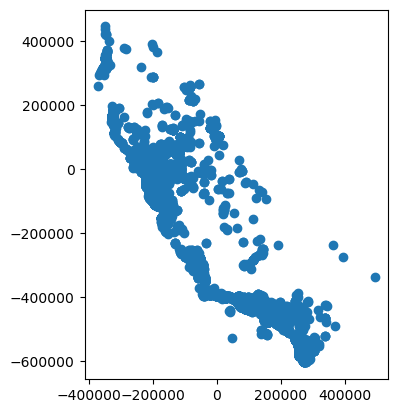

In [57]:
# Convert trash df to geopandas df
# Use EPSG:4326 WGS84 for initial conversion (https://spatialreference.org/ref/epsg/wgs-84/)
trash_gdf = gpd.GeoDataFrame(trash_df, geometry=gpd.points_from_xy(trash_df['Longitude'], trash_df['Latitude']), crs='EPSG:4326')

# Convert to EPSG:3310 to match shoreline df (see below)
trash_gdf = trash_gdf.to_crs(3310)

print(trash_gdf.crs)
print('Unit:', trash_gdf.crs.axis_info[0].unit_name)

trash_gdf.plot()

epsg:3310
Unit: metre
Number of records:  97
Number of columns:  11


<AxesSubplot: >

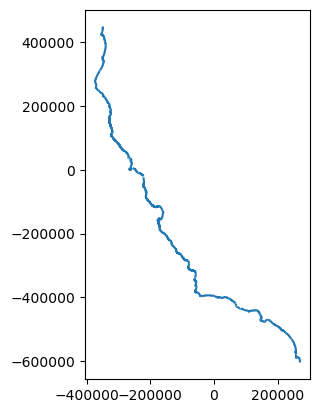

In [58]:
# Import shoreline shapefile as geopandas df
shoreline_gdf = gpd.read_file(shoreline_file_path)

# CRS is EPSG:3310 NAD83 / California Albers (https://spatialreference.org/ref/epsg/nad83-california-albers/)
print(shoreline_gdf.crs) 
print('Unit:', shoreline_gdf.crs.axis_info[0].unit_name)

print('Number of records: ', shoreline_gdf.shape[0])
print('Number of columns: ', shoreline_gdf.shape[1])
shoreline_gdf.plot()

Number of records:  1
Number of columns:  12


<AxesSubplot: >

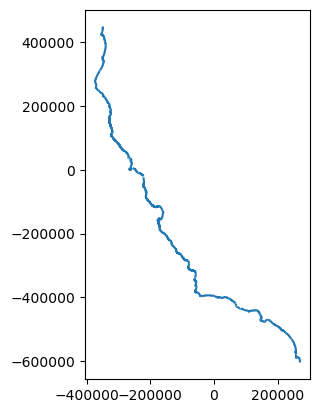

In [59]:
# Dissolve features to create a single geom for the shoreline
shoreline_gdf['DissolveField'] = 1
shoreline_dissolved_gdf = shoreline_gdf.dissolve(by='DissolveField', as_index=False)

print('Number of records: ', shoreline_dissolved_gdf.shape[0])
print('Number of columns: ', shoreline_dissolved_gdf.shape[1])
shoreline_dissolved_gdf.plot()

<AxesSubplot: >

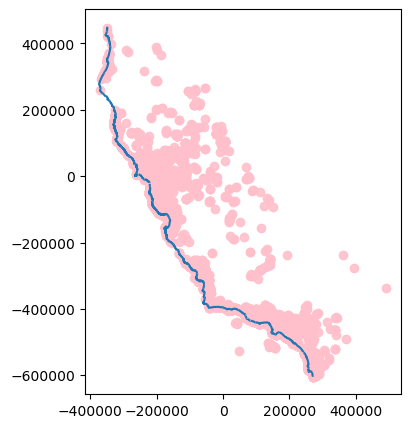

In [60]:
# Plot trash cleanup sites and shoreline together
fig, ax = plt.subplots(figsize=(5, 5))
trash_gdf.plot(ax=ax, alpha=0.9, color='pink')
shoreline_dissolved_gdf.plot(ax=ax)

In [61]:
# Compute the distance of each trash cleanup site to the shoreline
# https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.distance.html
# Meters is the default unit based on the CRS
trash_gdf['Distance to CA Shoreline (m)'] = trash_gdf['geometry'].distance(shoreline_dissolved_gdf['geometry'][0])

# Duplicate column and convert meters to kilometers
# This step is not necessary, but I wanted to provide both options for the user
trash_gdf['Distance to CA Shoreline (km)'] = trash_gdf['Distance to CA Shoreline (m)'] / 1000

print('Number of records: ', trash_gdf.shape[0])
print('Number of columns: ', trash_gdf.shape[1])
trash_gdf.head()

Number of records:  27910
Number of columns:  70


,Cleanup ID,Zone,State,Country,GPS,Cleanup Type,Cleanup Date,Group Name,Adults,Children,...,Gloves & Masks (PPE),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected,Latitude,Longitude,geometry,Distance to CA Shoreline (m),Distance to CA Shoreline (km)
0,14360,"Alameda County, CA, USA","California, USA",United States,"37.862589484598, -122.31531322002",beach,2016-01-16,BHS Environmental Science Class,1,7,...,<NA>,57,<NA>,140,621,37.862589484598,-122.31531322002,POINT (-203401.107 -14611.198),19502.745167,19.502745
1,14361,"Alameda County, CA, USA","California, USA",United States,"37.862589484598, -122.31531322002",beach,2016-01-27,Crestwood Healing Center,6,0,...,<NA>,304,<NA>,635,1163,37.862589484598,-122.31531322002,POINT (-203401.107 -14611.198),19502.745167,19.502745
2,14369,"Alameda County, CA, USA","California, USA",United States,"37.862589484598, -122.31531322002",beach,2016-01-30,Mormon Helping Hands,86,0,...,<NA>,1086,212,1087,5129,37.862589484598,-122.31531322002,POINT (-203401.107 -14611.198),19502.745167,19.502745
3,1531,"Contra Costa County, CA, USA","California, USA",United States,"37.8468, -122.13611",beach,2016-02-05,NaN,1,0,...,<NA>,<NA>,<NA>,19,67,37.8468,-122.13611,POINT (-187700.347 -16735.565),34046.184874,34.046185
4,14367,"Alameda County, CA, USA","California, USA",United States,"37.862589484598, -122.31531322002",beach,2016-02-20,Whole Foods Employees,3,0,...,<NA>,16,<NA>,80,317,37.862589484598,-122.31531322002,POINT (-203401.107 -14611.198),19502.745167,19.502745


In [62]:
# Copy gdf and drop geometry column
trash_export_gdf = trash_gdf.drop('geometry', axis=1)

# Export trash cleanup data to CSV
export_path = r'./export/'
export_file = 'OceanConservancy_CA_WithDistance.csv'

trash_export_gdf.to_csv(export_path + export_file, index=False, encoding='utf-8-sig')